In [1]:
import pandas as pd
import numpy as np

# 정확하게 10년치 사업보고서가 모두 있는 perfect_crp 구하는 과정

기존에 만들어놓은 date_df라는 데이터프레임을 이용한다.(만든 과정은 data_setting.ipynb 참고)

date_df는 총 10년(2010~2019년)의 기간동안 한 번이라도 KOSPI200에 포함된 적 있었던 기업들을 칼럼으로 만들고, 해당 날짜에 KOSPI200에 포함되어 있었다면 O, 제외되어 있었다면 X로 표시한다.

In [2]:
date_df = pd.read_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\date_df.csv', encoding='euc-kr').set_index('Date')
date_df

,AK홀딩스,BGF,BGF리테일,BNK금융지주,CJ,CJ CGV,CJ대한통운,CJ제일제당,DB손해보험,DB하이텍,...,현대해상,현대홈쇼핑,호텔신라,화신,효성,효성중공업,후성,휠라홀딩스,휴비스,휴켐스
Date,,,,,,,,,,,,,,,,,,,,,
20100101,O,X,X,X,O,X,O,O,X,O,...,X,X,X,X,O,X,O,X,X,O
20100102,O,X,X,X,O,X,O,O,X,O,...,X,X,X,X,O,X,O,X,X,O
20100103,O,X,X,X,O,X,O,O,X,O,...,X,X,X,X,O,X,O,X,X,O
20100104,O,X,X,X,O,X,O,O,X,O,...,X,X,X,X,O,X,O,X,X,O
20100105,O,X,X,X,O,X,O,O,X,O,...,X,X,X,X,O,X,O,X,X,O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20191227,O,O,O,O,O,O,O,O,O,O,...,O,O,O,X,O,O,O,O,X,O
20191228,O,O,O,O,O,O,O,O,O,O,...,O,O,O,X,O,O,O,O,X,O
20191229,O,O,O,O,O,O,O,O,O,O,...,O,O,O,X,O,O,O,O,X,O


In [3]:
date_df.index = list(map(str, date_df.index))  # index를 문자열로 만들어줌
perfect_crp = []
for c in date_df.columns.values:
    if len(date_df[date_df[c] == 'O'].index) == len(date_df.index):   # 전체 기간동안 O로 표시된 기업(KOSPI200에 포함된 기업)을 perfect_crp 리스트에 담음
        perfect_crp.append(c)

In [5]:
len(perfect_crp)

115

# 제외할 기업

perfect_crp로 뽑은 총 115개의 기업 중 제외해야 할 기업이 있다. 대표적으로 삼성물산과 SK가 있는데, 

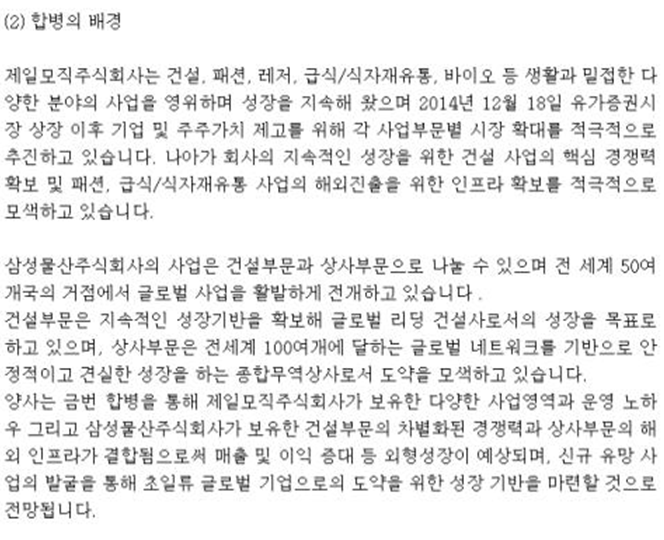
1. 총체적으로 본다면 삼성물산은 10년 내내 KOSPI200에 포함된 듯 보이지만, 삼성물산의 '주요사항보고서'에 쓰여 있는 위의 정보에 따르면 2015년 9월 1일 합병기일을 기준으로 제일모직주식회사와 삼성물산주식회사가 합병되어 제일모직주식회사의 이름도 삼성물산으로 바뀌었다. 제일모직주식회사는 Dart 기업공시 사이트에서 삼성물산(유가회사)로 나타나고, 기존의 삼성물산은 삼성물산(기타회사)로 나타난다. 최근까지 남아있는 회사는 (구)제일모직주식회사인 삼성물산(유가회사)이고, 삼성물산(유가, 028260)는 20150313부터 20191231까지 KOSPI200에 포함됐고, 2013년도부터 2018년도 사업보고서밖에 없다. 반면, 삼성물산(기타, 000830)은 20100101부터 20150831까지 KOSPI200에 포함됐고 2009년도부터 2012년도 사업보고서밖에 없다.

따라서, 합병되기 전의 삼성물산 보고서와 합병된 후의 삼성물산 보고서의 내용이 사뭇 다르므로 '삼성물산'은 가독성 분석 프로젝트에서 제외한다.

2. 기업코드를 사용하여 사업보고서를 추출했는데, SK는 특이하게 같은 이름으로 2개의 회사가 존재한다. 2012년도 12월 사업보고서를 확인해보면 SK(유가회사, 034730)와 SK(기타회사, 003600)로 2개가 있다는 것을 확인할 수 있다. SK(기타회사)의 공식명칭은 SK지주회사로, 네이버금융에 SK지주회사는 나오지 않고, SK(유가회사)만 있는 것을 확인했다. (+ SK지주회사는 2009~2014 사업보고서밖에 없다)

따라서 가독성 분석 프로젝트에서 논의의 혼란을 줄이고자 'SK'를 제외하도록 한다.

In [6]:
# 삼성물산, SK 제외
print(perfect_crp.index('삼성물산'))
print(perfect_crp.index('SK'))

65
24


In [7]:
del perfect_crp[65]
del perfect_crp[24]
perfect_crp

['CJ',
 'CJ대한통운',
 'CJ제일제당',
 'GS',
 'HDC',
 'KB금융',
 '케이씨씨',
 '케이티',
 '케이티앤지',
 'LF',
 'LG',
 'LG디스플레이',
 'LG상사',
 'LG생활건강',
 'LG전자',
 'LG화학',
 'LS',
 'LS산전',
 'NAVER',
 'NH투자증권',
 'OCI',
 '포스코',
 'S&T모티브',
 'S-Oil',
 'SKC',
 'SK네트웍스',
 'SK디스커버리',
 'SK이노베이션',
 'SK텔레콤',
 'SK하이닉스',
 '강원랜드',
 '고려아연',
 '고려제강',
 '금호석유화학',
 '기아자동차',
 '기업은행',
 '남양유업',
 '남해화학',
 '넥센타이어',
 '녹십자',
 '농심',
 '대교',
 '대덕전자',
 '대림산업',
 '대상',
 '대우건설',
 '대웅제약',
 '대한유화',
 '대한항공',
 '동국제강',
 '동아쏘시오홀딩스',
 '두산',
 '두산인프라코어',
 '두산중공업',
 '롯데쇼핑',
 '롯데정밀화학',
 '롯데지주',
 '롯데칠성음료',
 '롯데케미칼',
 '롯데푸드',
 '미래에셋대우',
 '부광약품',
 '빙그레',
 '삼성SDI',
 '삼성엔지니어링',
 '삼성전기',
 '삼성전자',
 '삼성중공업',
 '삼성증권',
 '삼성카드',
 '삼성화재해상보험',
 '삼양홀딩스',
 '세방전지',
 '세아베스틸',
 '신세계',
 '신한지주',
 '쌍용양회공업',
 '아모레퍼시픽그룹',
 '아모레퍼시픽',
 '에스원',
 '엔씨소프트',
 '영풍',
 '오뚜기',
 '오리온홀딩스',
 '유니드',
 '유한양행',
 '일양약품',
 '제일기획',
 '코웨이',
 '태광산업',
 '포스코인터내셔널',
 '하나금융지주',
 '한국가스공사',
 '한국금융지주',
 '한국단자공업',
 '한국전력공사',
 '한국조선해양',
 '한국테크놀로지그룹',
 '한섬',
 '한온시스템',
 '한화',
 '한화솔루션',
 '한화에어로스페이스',
 '현대건설',
 '현대

In [8]:
len(perfect_crp)

113

# NaN값 제외

perfect_crp을 만든 후에 회사의 사업보고서들 중 크롤링 오류로 사업보고서 내용을 나타내는 칼럼 'str'이 NaN값으로 나타나는 게 하나라도 있을 때, 그 회사는 잠시 제외하고 진행한다. 크롤링 오류로 나타난 회사는 총 6개이다.(LG, LS, LS산전, SK하이닉스, 삼성증권, 삼성카드)
- LG 2017, 2018
- LS 2013, 2015, 2017
- LS산전 2015, 2016, 2017
- SK하이닉스 2018
- 삼성증권 2018
- 삼성카드 2016, 2017, 2018

In [10]:
lv1 = pd.read_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\최종본\Lv.1_dongchan.csv', encoding='euc-kr', index_col=0)
lv1.index.name = 'index'
lv1

,crp_nm,crp_cd,연도,rpt_nm,rcp_no,rcp_dt,rmk,url,str,str_tokens
index,,,,,,,,,,
0,AK홀딩스,6840,2018,사업보고서 (2018.12),20190401004433,20190401,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 당사 가 동 ...
1,AK홀딩스,6840,2017,사업보고서 (2017.12),20180330002417,20180330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 당사 가 동 사...
2,AK홀딩스,6840,2016,사업보고서 (2016.12),20170331003282,20170331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 당사 가 동 사...
3,AK홀딩스,6840,2015,사업보고서 (2015.12),20160330003602,20160330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 당사 가 동 사...
4,AK홀딩스,6840,2014,사업보고서 (2014.12),20150331003839,20150331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항당사가 동 사업보고서에...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 당사 가 동 사...
...,...,...,...,...,...,...,...,...,...,...
2868,휴켐스,69260,2013,사업보고서 (2013.12),20140331003099,20140331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
2869,휴켐스,69260,2012,사업보고서 (2012.12),20130401000720,20130401,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
2870,휴켐스,69260,2011,사업보고서 (2011.12),20120330000492,20120330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...


In [14]:
df = pd.DataFrame()
for crp in perfect_crp:
    temp = lv1[lv1.crp_nm == crp]
    df = pd.concat([df, temp])
df = df.reset_index(drop=True)
df

,crp_nm,crp_cd,연도,rpt_nm,rcp_no,rcp_dt,rmk,url,str,str_tokens
0,CJ,1040,2018,사업보고서 (2018.12),20190329004141,20190329,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...
1,CJ,1040,2017,사업보고서 (2017.12),20180330003087,20180330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...
2,CJ,1040,2016,사업보고서 (2016.12),20170331004642,20170331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
3,CJ,1040,2015,사업보고서 (2015.12),20160330003575,20160330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
4,CJ,1040,2014,사업보고서 (2014.12),20150331004081,20150331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
...,...,...,...,...,...,...,...,...,...,...
1125,휴켐스,69260,2013,사업보고서 (2013.12),20140331003099,20140331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1126,휴켐스,69260,2012,사업보고서 (2012.12),20130401000720,20130401,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1127,휴켐스,69260,2011,사업보고서 (2011.12),20120330000492,20120330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1128,휴켐스,69260,2010,[첨부추가]사업보고서 (2010.12),20110331002418,20110331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...


In [15]:
set_aside_crp = df[df.str.isnull()].crp_nm.unique()
set_aside_crp

array(['LG', 'LS', 'LS산전', 'SK하이닉스', '삼성증권', '삼성카드'], dtype=object)

In [16]:
for z in set_aside_crp:
    print(perfect_crp.index(z))

10
16
17
29
68
69


In [17]:
del perfect_crp[69]
del perfect_crp[68]
del perfect_crp[29]
del perfect_crp[17]
del perfect_crp[16]
del perfect_crp[10]
len(perfect_crp)

107

In [18]:
df = pd.DataFrame()
for crp in perfect_crp:
    temp = lv1[lv1.crp_nm == crp]
    df = pd.concat([df, temp])
df = df.reset_index(drop=True)
df

,crp_nm,crp_cd,연도,rpt_nm,rcp_no,rcp_dt,rmk,url,str,str_tokens
0,CJ,1040,2018,사업보고서 (2018.12),20190329004141,20190329,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,IV. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 자료는 회사의 재...,IV 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 ...
1,CJ,1040,2017,사업보고서 (2017.12),20180330003087,20180330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,"V. 이사의 경영진단 및 분석의견1. 요약재무정보본 자료는 회사의 재무상황, 영업실...",V 이사 의 경영진단 및 분석 의견 요약 재무 정보 보 자료 는 회사 의 재무 상황...
2,CJ,1040,2016,사업보고서 (2016.12),20170331004642,20170331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
3,CJ,1040,2015,사업보고서 (2015.12),20160330003575,20160330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
4,CJ,1040,2014,사업보고서 (2014.12),20150331004081,20150331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견[예측정보에 대한 주의 사항]본 자료는 회사의 재무...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 보 자료 는 회...
...,...,...,...,...,...,...,...,...,...,...
1065,휴켐스,69260,2013,사업보고서 (2013.12),20140331003099,20140331,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1066,휴켐스,69260,2012,사업보고서 (2012.12),20130401000720,20130401,정연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1067,휴켐스,69260,2011,사업보고서 (2011.12),20120330000492,20120330,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견1. 예측정보에 대한 주의사항본 사업보고서에는 미래...,V 이사 의 경영진단 및 분석 의견 예측 정보 에 대한 주 의 사항 본 사업보고서 ...
1068,휴켐스,69260,2010,[첨부추가]사업보고서 (2010.12),20110331002418,20110331,연,http://dart.fss.or.kr/report/viewer.do?rcpNo=2...,V. 이사의 경영진단 및 분석의견휴켐스㈜ 이사회는 2010년 1월 1일부터 2010...,V 이사 의 경영진단 및 분석 의견 휴켐스 이사회 는 일 부터 일 까지 제 기 사업...


In [19]:
df.to_csv(r'C:\Users\PC\OneDrive\Data Science\Weak-supervision\생존편향 제거\완료된 데이터\최종본\Lv.1_perfect_crp.csv', encoding='euc-kr')